Using cache found in C:\Users\acer/.cache\torch\hub\ultralytics_yolov5_master
requirements: Ultralytics requirements ['gitpython>=3.1.30', 'setuptools>=65.5.1'] not found, attempting AutoUpdate...
requirements:  Command 'pip install --no-cache "gitpython>=3.1.30" "setuptools>=65.5.1" ' returned non-zero exit status 1.
YOLOv5  2023-10-1 Python-3.9.7 torch-2.0.1+cpu CPU

Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients
Adding AutoShape... 
image 1/1: 1109x1479 19 persons, 1 backpack, 2 handbags, 2 bottles, 1 pizza, 1 chair, 1 tv
Speed: 138.7ms pre-process, 867.9ms inference, 32.6ms NMS per image at shape (1, 3, 480, 640)


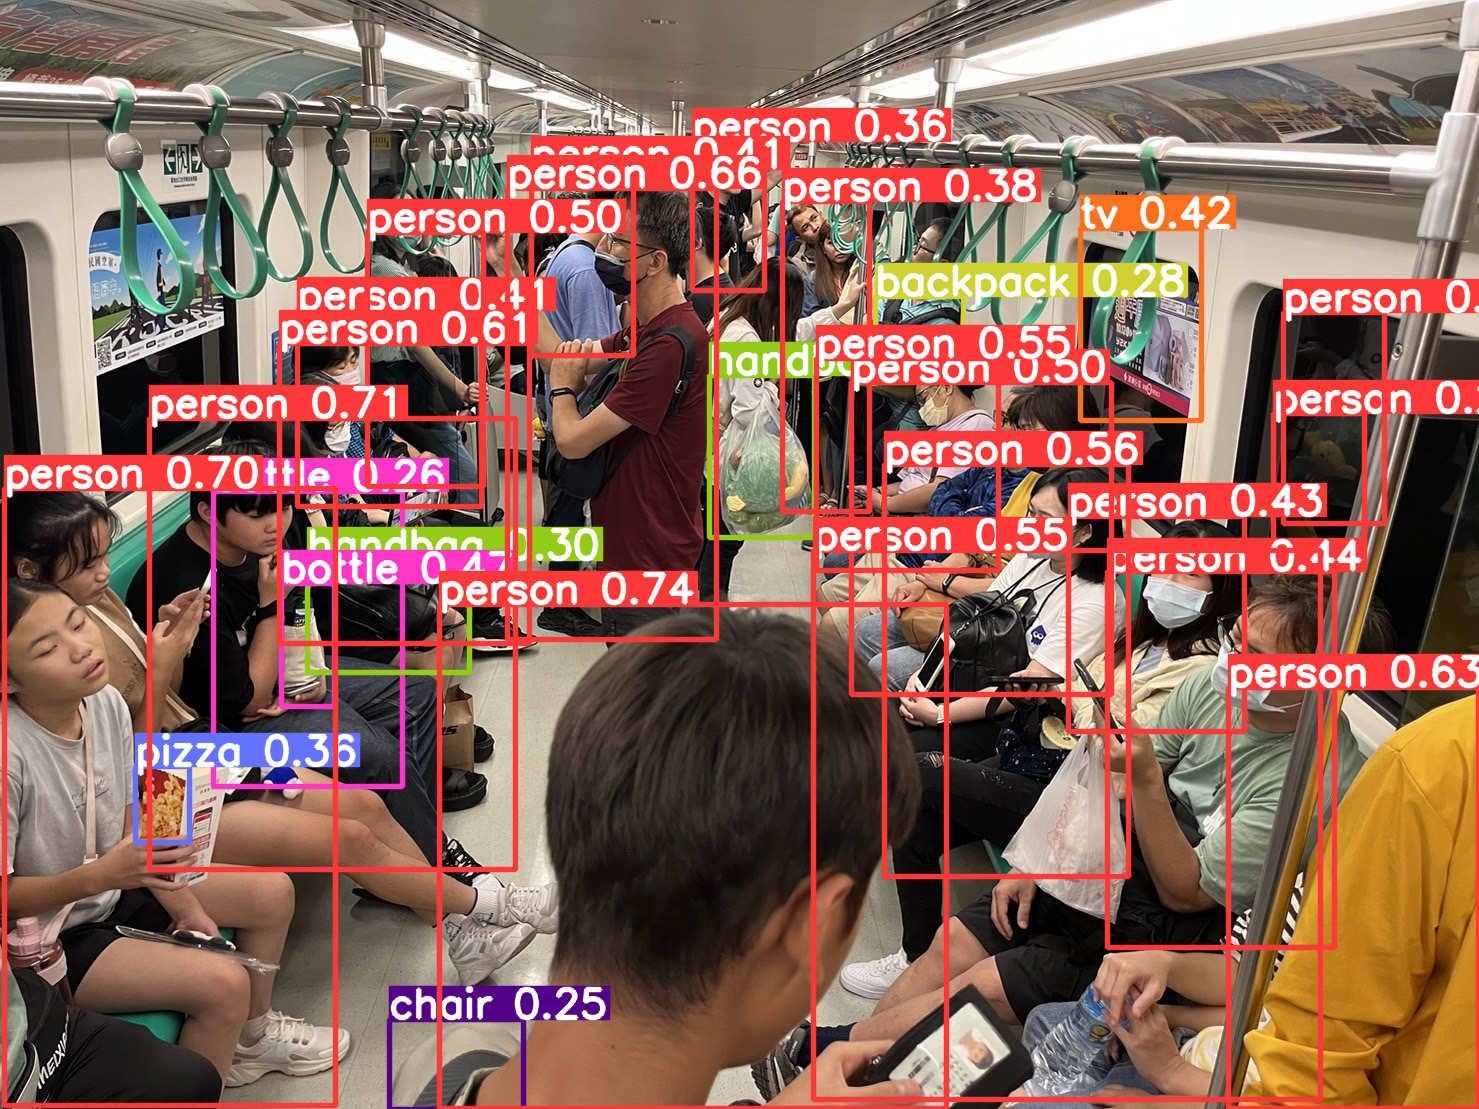

In [111]:
import torch

# Model
model = torch.hub.load("ultralytics/yolov5", "yolov5s")  # or yolov5n - yolov5x6, custom

# Images
img = "C:/Users/acer/yolov5-master/yolov5-master/imgs/擁擠/S__252403727.jpg"  # or file, Path, PIL, OpenCV, numpy, list

# Inference
results = model(img)

# Results
results.print()  # or .show(), .save(), .crop(), .pandas(), etc
results.show()

In [114]:
#hsiao
import torch
from PIL import Image, ImageDraw, ImageFont
import random
import os

# Model
model = torch.hub.load("ultralytics/yolov5", "yolov5s")  # or yolov5n - yolov5x6, custom

# 输入图像目录和输出目录
input_dir = "C:/Users/acer/yolov5-master/yolov5-master/imgs/不擁擠/"
output_dir = "C:/Users/acer/yolov5-master/yolov5-master/output/不擁擠/"

# 确保输出目录存在
os.makedirs(output_dir, exist_ok=True)

# 遍历输入目录中的所有图像文件
for filename in os.listdir(input_dir):
    if filename.endswith((".jpg", ".png", ".jpeg")):
        # 构建图像文件的完整路径
        img_path = os.path.join(input_dir, filename)

        # 进行物体检测
        results = model(img_path)

        # 读取图像
        img = Image.open(img_path)

        # 调整绘图参数
        draw = ImageDraw.Draw(img)
        line_width = 3  # 修改此参数以更改边框线条宽度
        font_size = 20  # 修改此参数以更改字体大小

        # 定义一个字典将类别索引映射到随机颜色
        class_colors = {}
        for class_index in range(len(results.names)):
            class_colors[class_index] = (random.randint(0, 255), random.randint(0, 255), random.randint(0, 255))
        # 获取图像的宽度和高度
        img_width, img_height = img.size

        # 定义中心区域的水平范围
        center_x_min = (img_width // 2) - 575  # 中心区域左边界
        center_x_max = (img_width // 2) + 575  # 中心区域右边界
        # 初始化计数
        item_count = 0
        person_count = 0

        # 迭代检测到的物体并绘制边界框
        for det in results.pred[0]:
            if det is not None and det[4] > 0.2:  # 根据置信度过滤检测结果
                class_index = int(det[5])  # 提取类别索引
                bbox = det[0:4].tolist()
                bbox_width = bbox[2] - bbox[0]
                bbox_height = bbox[3] - bbox[1]
                
                object_center_x = (bbox[0] + bbox[2]) / 2
                
                # 根据宽度和高度门限过滤太小或太远的物体
                if bbox_width * bbox_height >= 0 :
                    if results.names[class_index] == "suitcase" and det[4] > 0.4:
                        item_count += 1
                        # 绘制边界框
                        draw.rectangle(bbox, outline=class_colors[class_index], width=line_width)
                        font = ImageFont.truetype("arial.ttf", font_size)  # 可能需要指定字体文件的路径
                        class_label = results.names[class_index]  # 使用检测结果中的类别名称
                        confidence = round(float(det[4]), 2)  # 提取置信度并将其四舍五入为2位小数
                        text = f'{class_label} ({confidence})\n'
                        text += f'宽度: {bbox_width:.2f}\n'
                        text += f'高度: {bbox_height:.2f}\n'
                        draw.text((bbox[0], bbox[1]), text, fill=class_colors[class_index], font=font)
                    elif results.names[class_index] == "person" and not (bbox_width * bbox_height <= 27500 and center_x_min <= object_center_x <= center_x_max):
                        person_count += 1
                        # 绘制边界框
                        draw.rectangle(bbox, outline=class_colors[class_index], width=line_width)
                        font = ImageFont.truetype("arial.ttf", font_size)  # 可能需要指定字体文件的路径
                        class_label = results.names[class_index]  # 使用检测结果中的类别名称
                        confidence = round(float(det[4]), 2)  # 提取置信度并将其四舍五入为2位小数
                        text = f'{class_label} ({confidence})\n'
                        text += f'宽度: {bbox_width:.2f}\n'
                        text += f'高度: {bbox_height:.2f}\n'
                        draw.text((bbox[0], bbox[1]), text, fill=class_colors[class_index], font=font)
            

        # 计算总物体数量
        total_objects = item_count + person_count
        

        # 根据总数确定拥挤程度
        congestion_level = ""
        if total_objects <= 10:
            congestion_level = "拥挤程度: low"
        elif 10 < total_objects <= 13:
            congestion_level = "拥挤程度: medium"
        else:
            congestion_level = "拥挤程度: high"
            
        if results.names[class_index] == "bench":
            congestion_level = "拥挤程度: low"
        if results.names[class_index] == "chair" and det[4] > 0.4:
            congestion_level = "拥挤程度: low"
    
        print("item_count:", item_count)
        print("person_count:", person_count)
        print("total_objects:", total_objects)
        print("level:", congestion_level)
        print("\n")

        # 在图像上添加拥挤程度标签
        font = ImageFont.truetype("arial.ttf", font_size)  # 可能需要指定字体文件的路径
        text = f'total: {total_objects} | item_count: {item_count} | person_count: {person_count}\n{congestion_level}'  # 在标签中包含总物体数和拥挤程度
        draw.text((10, 10), text, fill=(255, 255, 255), font=font)  # 根据需要调整位置和填充颜色

        # 保存修改后的图像到输出目录
        output_path = os.path.join(output_dir, filename)
        img.save(output_path)

Using cache found in C:\Users\acer/.cache\torch\hub\ultralytics_yolov5_master
requirements: Ultralytics requirements ['gitpython>=3.1.30', 'setuptools>=65.5.1'] not found, attempting AutoUpdate...
requirements:  Command 'pip install --no-cache "gitpython>=3.1.30" "setuptools>=65.5.1" ' returned non-zero exit status 1.
YOLOv5  2023-10-1 Python-3.9.7 torch-2.0.1+cpu CPU

Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients
Adding AutoShape... 


item_count: 0
person_count: 9
total_objects: 9
level: 拥挤程度: low


item_count: 0
person_count: 6
total_objects: 6
level: 拥挤程度: low


item_count: 0
person_count: 6
total_objects: 6
level: 拥挤程度: low


item_count: 0
person_count: 4
total_objects: 4
level: 拥挤程度: low


item_count: 0
person_count: 4
total_objects: 4
level: 拥挤程度: low


item_count: 0
person_count: 2
total_objects: 2
level: 拥挤程度: low


item_count: 0
person_count: 9
total_objects: 9
level: 拥挤程度: low


item_count: 0
person_count: 9
total_objects: 9
level: 拥挤程度: low


item_count: 0
person_count: 10
total_objects: 10
level: 拥挤程度: low


item_count: 0
person_count: 10
total_objects: 10
level: 拥挤程度: low


item_count: 0
person_count: 10
total_objects: 10
level: 拥挤程度: low


item_count: 0
person_count: 8
total_objects: 8
level: 拥挤程度: low


item_count: 0
person_count: 10
total_objects: 10
level: 拥挤程度: low


item_count: 0
person_count: 10
total_objects: 10
level: 拥挤程度: low


item_count: 0
person_count: 10
total_objects: 10
level: 拥挤程度: low


In [76]:
#original
import torch
from PIL import Image, ImageDraw, ImageFont
import random
import os

# Model
model = torch.hub.load("ultralytics/yolov5", "yolov5s")  # or yolov5n - yolov5x6, custom

# 输入图像目录和输出目录
input_dir = "C:/Users/acer/yolov5-master/yolov5-master/img/"
output_dir = "C:/Users/acer/yolov5-master/yolov5-master/output/extra/"

# 确保输出目录存在
os.makedirs(output_dir, exist_ok=True)

# 遍历输入目录中的所有图像文件
for filename in os.listdir(input_dir):
    if filename.endswith((".jpg", ".png", ".jpeg")):
        # 构建图像文件的完整路径
        img_path = os.path.join(input_dir, filename)

        # 进行物体检测
        results = model(img_path)

        # 读取图像
        img = Image.open(img_path)

        # 调整绘图参数
        draw = ImageDraw.Draw(img)
        line_width = 3  # 修改此参数以更改边框线条宽度
        font_size = 20  # 修改此参数以更改字体大小

        # 定义一个字典将类别索引映射到随机颜色
        class_colors = {}
        for class_index in range(len(results.names)):
            class_colors[class_index] = (random.randint(0, 255), random.randint(0, 255), random.randint(0, 255))

        # 初始化计数
        item_count = 0
        person_count = 0

        # 迭代检测到的物体并绘制边界框
        for det in results.pred[0]:
            if det is not None and det[4] > 0.2:  # 根据置信度过滤检测结果
                class_index = int(det[5])  # 提取类别索引
                bbox = det[0:4].tolist()
                bbox_width = bbox[2] - bbox[0]
                bbox_height = bbox[3] - bbox[1]

                # 根据宽度和高度门限过滤太小或太远的物体
                if bbox_width * bbox_height >= 0:
                    if results.names[class_index] == "suitcase":
                        item_count += 1
                    elif results.names[class_index] == "person":
                        person_count += 1
                if results.names[class_index] == "handbag":
                    handbag_count += 1

        # 计算总物体数量
        total_objects = item_count + person_count
        print("item_count:", item_count)
        print("person_count:", person_count)
        print("h:", handbag_count)

        # 根据总数确定拥挤程度
        congestion_level = ""
        if total_objects <= 13:
            congestion_level = "拥挤程度: low"
        elif 13 < total_objects < 16:
            congestion_level = "拥挤程度: medium"
        else:
            congestion_level = "拥挤程度: high"

        # 迭代检测到的物体并绘制边界框
        for det in results.pred[0]:
            if det is not None and det[4] > 0.2:  # 根据置信度过滤检测结果
                class_index = int(det[5])  # 提取类别索引
                bbox = det[0:4].tolist()
                bbox_width = bbox[2] - bbox[0]
                bbox_height = bbox[3] - bbox[1]

                # 根据宽度和高度门限过滤太小或太远的物体
                if bbox_width * bbox_height >= 0:
                    draw.rectangle(bbox, outline=class_colors[class_index], width=line_width)
                    font = ImageFont.truetype("arial.ttf", font_size)  # 可能需要指定字体文件的路径
                    class_label = results.names[class_index]  # 使用检测结果中的类别名称
                    confidence = round(float(det[4]), 2)  # 提取置信度并将其四舍五入为2位小数
                    text = f'{class_label} ({confidence})\n'
                    text += f'宽度: {bbox_width:.2f}\n'
                    text += f'高度: {bbox_height:.2f}\n'
                    draw.text((bbox[0], bbox[1]), text, fill=class_colors[class_index], font=font)


        # 在图像上添加拥挤程度标签
        font = ImageFont.truetype("arial.ttf", font_size)  # 可能需要指定字体文件的路径
        text = f'total: {total_objects} | item_count: {item_count} | person_count: {person_count}\n{congestion_level}'  # 在标签中包含总物体数和拥挤程度
        draw.text((10, 10), text, fill=(255, 255, 255), font=font)  # 根据需要调整位置和填充颜色

        # 保存修改后的图像到输出目录
        output_path = os.path.join(output_dir, filename)
        img.save(output_path)


Using cache found in C:\Users\acer/.cache\torch\hub\ultralytics_yolov5_master
requirements: Ultralytics requirements ['gitpython>=3.1.30', 'setuptools>=65.5.1'] not found, attempting AutoUpdate...
requirements:  Command 'pip install --no-cache "gitpython>=3.1.30" "setuptools>=65.5.1" ' returned non-zero exit status 1.
YOLOv5  2023-10-1 Python-3.9.7 torch-2.0.1+cpu CPU

Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients
Adding AutoShape... 


item_count: 0
person_count: 12
h: 5
item_count: 1
person_count: 18
h: 1
item_count: 0
person_count: 17
h: 3
item_count: 0
person_count: 16
h: 3


In [117]:
#shen
import torch
from PIL import Image, ImageDraw, ImageFont
import random
import os

# Model
model = torch.hub.load("ultralytics/yolov5", "yolov5s")  # or yolov5n - yolov5x6, custom

# 输入图像目录和输出目录
input_dir = "C:/Users/acer/yolov5-master/yolov5-master/imgs/不擁擠/"
output_dir = "C:/Users/acer/yolov5-master/yolov5-master/output/不擁擠/"

# 确保输出目录存在
os.makedirs(output_dir, exist_ok=True)

# 遍历输入目录中的所有图像文件
for filename in os.listdir(input_dir):
    if filename.endswith((".jpg", ".png", ".jpeg")):
        # 构建图像文件的完整路径
        img_path = os.path.join(input_dir, filename)

        # 进行物体检测
        results = model(img_path)

        # 读取图像
        img = Image.open(img_path)

        # 调整绘图参数
        draw = ImageDraw.Draw(img)
        line_width = 3  # 修改此参数以更改边框线条宽度
        font_size = 20  # 修改此参数以更改字体大小

        # 定义一个字典将类别索引映射到随机颜色
        class_colors = {}
        for class_index in range(len(results.names)):
            class_colors[class_index] = (random.randint(0, 255), random.randint(0, 255), random.randint(0, 255))

        # 初始化计数
        item_count = 0
        person_count = 0

        # 迭代检测到的物体并绘制边界框
        for det in results.pred[0]:
            if det is not None and det[4] > 0.2:  # 根据置信度过滤检测结果
                class_index = int(det[5])  # 提取类别索引
                bbox = det[0:4].tolist()
                bbox_width = bbox[2] - bbox[0]
                bbox_height = bbox[3] - bbox[1]

                # 根据宽度和高度门限过滤太小或太远的物体
                if bbox_width * bbox_height >= 23000:
                    if results.names[class_index] == "suitcase" and det[4] > 0.4:
                        item_count += 1
                    elif results.names[class_index] == "person":
                        person_count += 1

        # 计算总物体数量
        total_objects = item_count + person_count

        # 根据总数确定拥挤程度
        congestion_level = ""
        if total_objects <= 11:
            congestion_level = "拥挤程度: low"
        elif 11 < total_objects < 15:
            congestion_level = "拥挤程度: medium"
        else:
            congestion_level = "拥挤程度: high"
            
        if results.names[class_index] == "bench":
            congestion_level = "拥挤程度: low"
        if results.names[class_index] == "chair" and det[4] > 0.4:
            congestion_level = "拥挤程度: low"
            
        print("item_count:", item_count)
        print("person_count:", person_count)
        print("total_objects:", total_objects)
        print("level:", congestion_level)
        print("\n")
            

        # 迭代检测到的物体并绘制边界框
        for det in results.pred[0]:
            if det is not None and det[4] > 0.2:  # 根据置信度过滤检测结果
                class_index = int(det[5])  # 提取类别索引
                bbox = det[0:4].tolist()
                bbox_width = bbox[2] - bbox[0]
                bbox_height = bbox[3] - bbox[1]

                # 根据宽度和高度门限过滤太小或太远的物体
                if bbox_width * bbox_height >= 23000:
                    draw.rectangle(bbox, outline=class_colors[class_index], width=line_width)
                    font = ImageFont.truetype("arial.ttf", font_size)  # 可能需要指定字体文件的路径
                    class_label = results.names[class_index]  # 使用检测结果中的类别名称
                    confidence = round(float(det[4]), 2)  # 提取置信度并将其四舍五入为2位小数
                    text = f'{class_label} ({confidence})\n'
                    text += f'宽度: {bbox_width:.2f}\n'
                    text += f'高度: {bbox_height:.2f}\n'
                    draw.text((bbox[0], bbox[1]), text, fill=class_colors[class_index], font=font)


        # 在图像上添加拥挤程度标签
        font = ImageFont.truetype("arial.ttf", font_size)  # 可能需要指定字体文件的路径
        text = f'total: {total_objects} | item_count: {item_count} | person_count: {person_count}\n{congestion_level}'  # 在标签中包含总物体数和拥挤程度
        draw.text((10, 10), text, fill=(255, 255, 255), font=font)  # 根据需要调整位置和填充颜色

        # 保存修改后的图像到输出目录
        output_path = os.path.join(output_dir, filename)
        img.save(output_path)


Using cache found in C:\Users\acer/.cache\torch\hub\ultralytics_yolov5_master
requirements: Ultralytics requirements ['gitpython>=3.1.30', 'setuptools>=65.5.1'] not found, attempting AutoUpdate...
requirements:  Command 'pip install --no-cache "gitpython>=3.1.30" "setuptools>=65.5.1" ' returned non-zero exit status 1.
YOLOv5  2023-10-1 Python-3.9.7 torch-2.0.1+cpu CPU

Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients
Adding AutoShape... 


item_count: 0
person_count: 8
total_objects: 8
level: 拥挤程度: low


item_count: 0
person_count: 5
total_objects: 5
level: 拥挤程度: low


item_count: 0
person_count: 5
total_objects: 5
level: 拥挤程度: low


item_count: 0
person_count: 3
total_objects: 3
level: 拥挤程度: low


item_count: 0
person_count: 3
total_objects: 3
level: 拥挤程度: low


item_count: 0
person_count: 2
total_objects: 2
level: 拥挤程度: low


item_count: 0
person_count: 8
total_objects: 8
level: 拥挤程度: low


item_count: 0
person_count: 8
total_objects: 8
level: 拥挤程度: low


item_count: 0
person_count: 10
total_objects: 10
level: 拥挤程度: low


item_count: 0
person_count: 10
total_objects: 10
level: 拥挤程度: low


item_count: 0
person_count: 11
total_objects: 11
level: 拥挤程度: low


item_count: 0
person_count: 9
total_objects: 9
level: 拥挤程度: low


item_count: 0
person_count: 10
total_objects: 10
level: 拥挤程度: low


item_count: 0
person_count: 10
total_objects: 10
level: 拥挤程度: low


item_count: 0
person_count: 10
total_objects: 10
level: 拥挤程度: low


In [82]:
import torch
from PIL import Image, ImageDraw, ImageFont
import random

# Model
model = torch.hub.load("ultralytics/yolov5", "yolov5s")  # or yolov5n - yolov5x6, custom

# Images
img_path = "./img/S__17752256_0.jpg"  # or file, Path, PIL, OpenCV, numpy, list

# Inference
results = model(img_path)

# Load the image using PIL
img = Image.open(img_path)

# Results
results.print()  # or .show(), .save(), .crop(), .pandas(), etc

# Adjust the drawing parameters
draw = ImageDraw.Draw(img)
line_width = 3  # Modify this to change the border thickness
font_size = 20  # Modify this to change the font size

# Define a dictionary to map class indices to random colors
class_colors = {}
for class_index in range(len(results.names)):
    class_colors[class_index] = (random.randint(0, 255), random.randint(0, 255), random.randint(0, 255))

# 初始化
item_count = 0
person_count = 0

# Iterate through the detected objects and draw bounding boxes
for det in results.pred[0]:
    if det is not None and det[4] > 0.2:  # Filter detections by confidence threshold
        class_index = int(det[5])  # Extract the class index
        bbox = det[0:4].tolist()
        bbox_width = bbox[2] - bbox[0]
        bbox_height = bbox[3] - bbox[1]

        # Filter out objects that are too small or too far (based on width and height thresholds)
        if bbox_width * bbox_height >= 5000:
            if results.names[class_index] == "suitcase":
                item_count += 1
            elif results.names[class_index] == "handbag":
                item_count += 0.5
            elif results.names[class_index] == "person":
                person_count += 1

# 計算總的對象數量
total_objects = item_count + person_count
print("item_count:",item_count) 
print("person_count:",person_count) 

# 根据总数确定擁擠程度
congestion_level = ""
if total_objects <= 15:
    congestion_level = "擁擠程度: 低"
elif 15 < total_objects < 19:
    congestion_level = "擁擠程度: 尚可"
else:
    congestion_level = "擁擠程度: 高"

# Get image dimensions
img_width, img_height = img.size

# Calculate the center coordinates of the image
center_x = img_width / 2
center_y = img_height / 2

# Define the size of the center region
center_region_size =850  # You can adjust this value based on your needs

# Calculate the coordinates of the center region
center_region_x1 = center_x - center_region_size / 2
center_region_y1 = center_y - center_region_size / 2
center_region_x2 = center_x + center_region_size / 2
center_region_y2 = center_y + center_region_size / 2

# Count the number of people within the center region
people_in_center = 0
for det in results.pred[0]:
    if det is not None and det[4] > 0.2:  # Filter detections by confidence threshold
        class_index = int(det[5])  # Extract the class index
        if results.names[class_index] == "person":
            bbox = det[0:4].tolist()
            bbox_x1 = bbox[0]
            bbox_y1 = bbox[1]
            bbox_x2 = bbox[2]
            bbox_y2 = bbox[3]
            
            # Check if the person's bounding box is within the center region
            if bbox_x1 >= center_region_x1 and bbox_y1 >= center_region_y1 and bbox_x2 <= center_region_x2 and bbox_y2 <= center_region_y2:
                people_in_center += 1

print(people_in_center)
# Check if the number of people in the center region exceeds 5
if people_in_center > 5:
    congestion_level = "擁擠程度: 高"

# Iterate through the detected objects and draw bounding boxes
for det in results.pred[0]:
    if det is not None and det[4] > 0.2:  # Filter detections by confidence threshold
        class_index = int(det[5])  # Extract the class index
        bbox = det[0:4].tolist()
        bbox_width = bbox[2] - bbox[0]
        bbox_height = bbox[3] - bbox[1]

        # Filter out objects that are too small or too far (based on width and height thresholds)
        if bbox_width * bbox_height >= 5000:
                draw.rectangle(bbox, outline=class_colors[class_index], width=line_width)
                font = ImageFont.truetype("arial.ttf", font_size)  # You may need to specify the path to your font file
                class_label = results.names[class_index]  # Use class name from the results
                confidence = round(float(det[4]), 2)  # Extract confidence and round it to 2 decimal places
                text = f'{class_label} ({confidence})\n'
                text += f'寬度: {bbox_width:.2f}\n'
                text += f'高度: {bbox_height:.2f}\n'
                draw.text((bbox[0], bbox[1]), text, fill=class_colors[class_index], font=font)

# Draw a rectangle around the center region
draw.rectangle([center_region_x1, center_region_y1, center_region_x2, center_region_y2], outline=(255, 0, 0), width=line_width)

# Show the modified image
img.show()

# 在整张图片上显示对象总数和擁擠程度
font = ImageFont.truetype("arial.ttf", font_size)  # You may need to specify the path to your font file
text = f'總數: {total_objects} | {congestion_level}'  # Include total_objects and congestion level in the label
draw.text((10, 10), text, fill=(255, 255, 255), font=font)  # Adjust the position and fill color as needed
print(text)
results.pandas().xyxy[0]


Using cache found in C:\Users\acer/.cache\torch\hub\ultralytics_yolov5_master
requirements: Ultralytics requirements ['gitpython>=3.1.30', 'setuptools>=65.5.1'] not found, attempting AutoUpdate...
requirements:  Command 'pip install --no-cache "gitpython>=3.1.30" "setuptools>=65.5.1" ' returned non-zero exit status 1.
YOLOv5  2023-10-1 Python-3.9.7 torch-2.0.1+cpu CPU

Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients
Adding AutoShape... 
image 1/1: 1108x1478 14 persons, 1 handbag
Speed: 32.5ms pre-process, 264.0ms inference, 2.0ms NMS per image at shape (1, 3, 480, 640)


item_count: 0.5
person_count: 14
4
總數: 14.5 | 擁擠程度: 低


,xmin,ymin,xmax,ymax,confidence,class,name
0,350.439606,567.994873,716.923401,1106.606323,0.889363,0,person
1,682.171082,629.828369,907.553040,1105.523071,0.867362,0,person
2,931.913757,526.813416,1214.435547,1105.652100,0.855012,0,person
3,1071.124634,818.080811,1468.440063,1105.489014,0.788217,0,person
4,769.168396,547.855225,978.218750,956.203430,0.742970,0,person
5,832.064575,952.278931,955.734497,1108.000000,0.585861,26,handbag
6,0.006343,944.598083,563.459839,1108.000000,0.584184,0,person
7,228.832596,744.761292,363.330566,937.458496,0.481922,0,person
8,0.000000,685.385132,127.785004,963.908386,0.463791,0,person
9,1279.807861,779.827148,1384.520264,840.535339,0.444478,0,person


In [83]:
import torch
from PIL import Image, ImageDraw, ImageFont
import random

# Model
model = torch.hub.load("ultralytics/yolov5", "yolov5s")  # or yolov5n - yolov5x6, custom

# Images
img_path = "./img/S__17752256_0.jpg"  # or file, Path, PIL, OpenCV, numpy, list

# Inference
results = model(img_path)

# Load the image using PIL
img = Image.open(img_path)

# Results
results.print()  # or .show(), .save(), .crop(), .pandas(), etc

# Adjust the drawing parameters
draw = ImageDraw.Draw(img)
line_width = 3  # Modify this to change the border thickness
font_size = 20  # Modify this to change the font size

# Define a dictionary to map class indices to random colors
class_colors = {}
for class_index in range(len(results.names)):
    class_colors[class_index] = (random.randint(0, 255), random.randint(0, 255), random.randint(0, 255))

# 初始化
item_count = 0
person_count = 0

# Iterate through the detected objects and draw bounding boxes
for det in results.pred[0]:
    if det is not None and det[4] > 0.2:  # Filter detections by confidence threshold
        class_index = int(det[5])  # Extract the class index
        bbox = det[0:4].tolist()
        bbox_width = bbox[2] - bbox[0]
        bbox_height = bbox[3] - bbox[1]

        # Filter out objects that are too small or too far (based on width and height thresholds)
        if bbox_width * bbox_height >= 5000:
            if results.names[class_index] == "suitcase":
                item_count += 1
            elif results.names[class_index] == "handbag":
                item_count += 0.5
            elif results.names[class_index] == "person":
                person_count += 1

# 計算總的對象數量
total_objects = item_count + person_count
print("item_count:", item_count)
print("person_count:", person_count)

# 根据总数确定擁擠程度
congestion_level = ""
if total_objects <= 15:
    congestion_level = "擁擠程度: 低"
elif 15 < total_objects < 19:
    congestion_level = "擁擠程度: 尚可"
else:
    congestion_level = "擁擠程度: 高"

# Get image dimensions
img_width, img_height = img.size

# Calculate the center coordinates of the image
center_x = img_width / 2
center_y = img_height / 2

# Define the width and height of the center region
center_region_width = 850  # You can adjust the width as needed
center_region_height = img_height  # Set the height to the full height of the image

# Calculate the coordinates of the center region
center_region_x1 = center_x - center_region_width / 2
center_region_y1 = center_y - center_region_height / 2
center_region_x2 = center_x + center_region_width / 2
center_region_y2 = center_y + center_region_height / 2

# Count the number of people within the center region
people_in_center = 0
for det in results.pred[0]:
    if det is not None and det[4] > 0.2:  # Filter detections by confidence threshold
        class_index = int(det[5])  # Extract the class index
        if results.names[class_index] == "person":
            bbox = det[0:4].tolist()
            bbox_x1 = bbox[0]
            bbox_y1 = bbox[1]
            bbox_x2 = bbox[2]
            bbox_y2 = bbox[3]

            # Check if the person's bounding box is within the center region
            if bbox_x1 >= center_region_x1 and bbox_y1 >= center_region_y1 and bbox_x2 <= center_region_x2 and bbox_y2 <= center_region_y2:
                people_in_center += 1

print(people_in_center)
# Check if the number of people in the center region exceeds 5
if people_in_center > 5:
    congestion_level = "擁擠程度: 高"

# Iterate through the detected objects and draw bounding boxes
for det in results.pred[0]:
    if det is not None and det[4] > 0.2:  # Filter detections by confidence threshold
        class_index = int(det[5])  # Extract the class index
        bbox = det[0:4].tolist()
        bbox_width = bbox[2] - bbox[0]
        bbox_height = bbox[3] - bbox[1]

        # Filter out objects that are too small or too far (based on width and height thresholds)
        if bbox_width * bbox_height >= 5000:
            if people_in_center > 5 and bbox[0] >= center_region_x1 and bbox[2] <= center_region_x2 and bbox[1] >= center_region_y1 and bbox[3] <= center_region_y2:
                # Draw a red bounding box for people in the center
                draw.rectangle(bbox, outline=(255, 0, 0), width=line_width)
            else:
                # Draw bounding boxes for other objects with random colors
                draw.rectangle(bbox, outline=class_colors[class_index], width=line_width)
            font = ImageFont.truetype("arial.ttf", font_size)  # You may need to specify the path to your font file
            class_label = results.names[class_index]  # Use class name from the results
            confidence = round(float(det[4]), 2)  # Extract confidence and round it to 2 decimal places
            text = f'{class_label} ({confidence})\n'
            text += f'寬度: {bbox_width:.2f}\n'
            text += f'高度: {bbox_height:.2f}\n'
            draw.text((bbox[0], bbox[1]), text, fill=class_colors[class_index], font=font)

# Draw a rectangle around the center region
draw.rectangle([center_region_x1, center_region_y1, center_region_x2, center_region_y2], outline=(255, 0, 0), width=line_width)

# Show the modified image
img.show()

# 在整张图片上显示对象总数和擁擠程度
font = ImageFont.truetype("arial.ttf", font_size)  # You may need to specify the path to your font file
text = f'總數: {total_objects} | {congestion_level}'  # Include total_objects and congestion level in the label
draw.text((10, 10), text, fill=(255, 255, 255), font=font)  # Adjust the position and fill color as needed
print(text)
results.pandas().xyxy[0]


Using cache found in C:\Users\acer/.cache\torch\hub\ultralytics_yolov5_master
requirements: Ultralytics requirements ['gitpython>=3.1.30', 'setuptools>=65.5.1'] not found, attempting AutoUpdate...
requirements:  Command 'pip install --no-cache "gitpython>=3.1.30" "setuptools>=65.5.1" ' returned non-zero exit status 1.
YOLOv5  2023-10-1 Python-3.9.7 torch-2.0.1+cpu CPU

Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients
Adding AutoShape... 
image 1/1: 1108x1478 14 persons, 1 handbag
Speed: 57.7ms pre-process, 353.8ms inference, 3.0ms NMS per image at shape (1, 3, 480, 640)


item_count: 0.5
person_count: 14
6
總數: 14.5 | 擁擠程度: 高


,xmin,ymin,xmax,ymax,confidence,class,name
0,350.439606,567.994873,716.923401,1106.606323,0.889363,0,person
1,682.171082,629.828369,907.553040,1105.523071,0.867362,0,person
2,931.913757,526.813416,1214.435547,1105.652100,0.855012,0,person
3,1071.124634,818.080811,1468.440063,1105.489014,0.788217,0,person
4,769.168396,547.855225,978.218750,956.203430,0.742970,0,person
5,832.064575,952.278931,955.734497,1108.000000,0.585861,26,handbag
6,0.006343,944.598083,563.459839,1108.000000,0.584184,0,person
7,228.832596,744.761292,363.330566,937.458496,0.481922,0,person
8,0.000000,685.385132,127.785004,963.908386,0.463791,0,person
9,1279.807861,779.827148,1384.520264,840.535339,0.444478,0,person


In [13]:
import torch
from PIL import Image, ImageDraw, ImageFont
import random

# Model
model = torch.hub.load("ultralytics/yolov5", "yolov5s")  # or yolov5n - yolov5x6, custom

# Images


# Inference
results = model(img_path)

# Load the image using PIL
img = Image.open(img_path)

# Results
results.print()  # or .show(), .save(), .crop(), .pandas(), etc

# Adjust the drawing parameters
draw = ImageDraw.Draw(img)
line_width = 3  # Modify this to change the border thickness
font_size = 20  # Modify this to change the font size

# Define a dictionary to map class indices to random colors
class_colors = {}
for class_index in range(len(results.names)):
    class_colors[class_index] = (random.randint(0, 255), random.randint(0, 255), random.randint(0, 255))

# 初始化
item_count = 0
person_count = 0

# Iterate through the detected objects and draw bounding boxes
for det in results.pred[0]:
    if det is not None and det[4] > 0.2:  # Filter detections by confidence threshold
        class_index = int(det[5])  # Extract the class index
        bbox = det[0:4].tolist()
        bbox_width = bbox[2] - bbox[0]
        bbox_height = bbox[3] - bbox[1]

        # Filter out objects that are too small or too far (based on width and height thresholds)
        if bbox_width * bbox_height >= 5000:
            if results.names[class_index] == "suitcase":
                item_count += 1
            elif results.names[class_index] == "handbag":
                item_count += 0.5
            elif results.names[class_index] == "person":
                person_count += 1

# 計算總的對象數量
total_objects = item_count + person_count
print("item_count:", item_count)
print("person_count:", person_count)

# 根据总数确定擁擠程度
congestion_level = ""
if total_objects <= 15:
    congestion_level = "擁擠程度: 低"
elif 15 < total_objects < 19:
    congestion_level = "擁擠程度: 尚可"
else:
    congestion_level = "擁擠程度: 高"

# Get image dimensions
img_width, img_height = img.size

# Calculate the center coordinates of the image
center_x = img_width / 2
center_y = img_height / 2

# Define the width and height of the center region
center_region_width = 850  # You can adjust the width as needed
center_region_height = img_height  # Set the height to the full height of the image

# Calculate the coordinates of the center region
center_region_x1 = center_x - center_region_width / 2
center_region_y1 = center_y - center_region_height / 2
center_region_x2 = center_x + center_region_width / 2
center_region_y2 = center_y + center_region_height / 2

# Count the number of people within the center region
people_in_center = 0
for det in results.pred[0]:
    if det is not None and det[4] > 0.2:  # Filter detections by confidence threshold
        class_index = int(det[5])  # Extract the class index
        if results.names[class_index] == "person":
            bbox = det[0:4].tolist()
            bbox_x1 = bbox[0]
            bbox_y1 = bbox[1]
            bbox_x2 = bbox[2]
            bbox_y2 = bbox[3]

            # Calculate the intersection area between the bounding box and the center region
            intersection_area = max(0, min(center_region_x2, bbox_x2) - max(center_region_x1, bbox_x1)) * max(0, min(center_region_y2, bbox_y2) - max(center_region_y1, bbox_y1))
            bbox_area = (bbox_x2 - bbox_x1) * (bbox_y2 - bbox_y1)

            # Check if the intersection area is at least 80% of the bounding box area
            if intersection_area >= 0.8 * bbox_area:
                people_in_center += 1

print(people_in_center)
# Check if the number of people in the center region exceeds 5
if people_in_center > 8:
    congestion_level = "擁擠程度: 高"

# Iterate through the detected objects and draw bounding boxes
for det in results.pred[0]:
    if det is not None and det[4] > 0.2:  # Filter detections by confidence threshold
        class_index = int(det[5])  # Extract the class index
        bbox = det[0:4].tolist()
        bbox_width = bbox[2] - bbox[0]
        bbox_height = bbox[3] - bbox[1]

        # Filter out objects that are too small or too far (based on width and height thresholds)
        if bbox_width * bbox_height >= 5000:
            if people_in_center > 5 and bbox[0] >= center_region_x1 and bbox[2] <= center_region_x2 and bbox[1] >= center_region_y1 and bbox[3] <= center_region_y2:
                # Draw a red bounding box for people in the center
                draw.rectangle(bbox, outline=(255, 0, 0), width=line_width)
            else:
                # Draw bounding boxes for other objects with random colors
                draw.rectangle(bbox, outline=class_colors[class_index], width=line_width)
            font = ImageFont.truetype("arial.ttf", font_size)  # You may need to specify the path to your font file
            class_label = results.names[class_index]  # Use class name from the results
            confidence = round(float(det[4]), 2)  # Extract confidence and round it to 2 decimal places
            text = f'{class_label} ({confidence})\n'
            text += f'寬度: {bbox_width:.2f}\n'
            text += f'高度: {bbox_height:.2f}\n'
            draw.text((bbox[0], bbox[1]), text, fill=class_colors[class_index], font=font)

# Draw a rectangle around the center region
draw.rectangle([center_region_x1, center_region_y1, center_region_x2, center_region_y2], outline=(255, 0, 0), width=line_width)

# Show the modified image
img.show()

# 在整张图片上显示对象总数和擁擠程度
font = ImageFont.truetype("arial.ttf", font_size)  # You may need to specify the path to your font file
text = f'總數: {total_objects} | {congestion_level}'  # Include total_objects and congestion level in the label
draw.text((10, 10), text, fill=(255, 255, 255), font=font)  # Adjust the position and fill color as needed
print(text)
results.pandas().xyxy[0]


Using cache found in C:\Users\acer/.cache\torch\hub\ultralytics_yolov5_master
requirements: Ultralytics requirements ['gitpython>=3.1.30', 'setuptools>=65.5.1'] not found, attempting AutoUpdate...
requirements:  Command 'pip install --no-cache "gitpython>=3.1.30" "setuptools>=65.5.1" ' returned non-zero exit status 1.
YOLOv5  2023-10-1 Python-3.9.7 torch-2.0.1+cpu CPU

Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients
Adding AutoShape... 
image 1/1: 1109x1479 16 persons, 1 handbag, 1 chair, 1 cell phone
Speed: 68.3ms pre-process, 504.4ms inference, 27.3ms NMS per image at shape (1, 3, 480, 640)


item_count: 0.5
person_count: 16
8
總數: 16.5 | 擁擠程度: 尚可


,xmin,ymin,xmax,ymax,confidence,class,name
0,541.404907,551.086914,1270.686279,1106.717407,0.828634,0,person
1,979.950317,352.965759,1285.712891,800.970886,0.742703,0,person
2,2.778513,618.299927,335.440613,1105.317871,0.715912,0,person
3,502.559692,993.807251,650.034119,1066.363403,0.674195,67,cell phone
4,1104.333130,612.509766,1267.076782,770.251831,0.644464,26,handbag
5,96.316650,557.236389,500.064209,1103.350342,0.586712,0,person
6,910.726135,351.664032,1126.203003,689.086975,0.582366,0,person
7,328.738586,328.479736,515.084900,578.577148,0.578008,0,person
8,194.903351,458.782074,516.813965,771.263489,0.551906,0,person
9,611.425781,224.283722,913.042053,877.346680,0.549604,0,person


In [14]:
import torch
from PIL import Image, ImageDraw, ImageFont
import random
import os

# Model
model = torch.hub.load("ultralytics/yolov5", "yolov5s")  # or yolov5n - yolov5x6, custom

# 输入图像目录和输出目录
input_dir = "C:/Users/acer/yolov5-master/yolov5-master/imgs/imgs/"
output_dir = "C:/Users/acer/yolov5-master/yolov5-master/output/"

# 确保输出目录存在
os.makedirs(output_dir, exist_ok=True)

# 遍历输入目录中的所有图像文件
for filename in os.listdir(input_dir):
    if filename.endswith((".jpg", ".png", ".jpeg")):
        # 构建图像文件的完整路径
        img_path = os.path.join(input_dir, filename)

        # 进行物体检测
        results = model(img_path)

        # 读取图像
        img = Image.open(img_path)

        # 调整绘图参数
        draw = ImageDraw.Draw(img)
        line_width = 3  # 修改此参数以更改边框线条宽度
        font_size = 20  # 修改此参数以更改字体大小

        # 定义一个字典将类别索引映射到随机颜色
        class_colors = {}
        for class_index in range(len(results.names)):
            class_colors[class_index] = (random.randint(0, 255), random.randint(0, 255), random.randint(0, 255))

        # 初始化计数
        item_count = 0
        person_count = 0

        # 迭代检测到的物体并绘制边界框
        for det in results.pred[0]:
            if det is not None and det[4] > 0.2:  # 根据置信度过滤检测结果
                class_index = int(det[5])  # 提取类别索引
                bbox = det[0:4].tolist()
                bbox_width = bbox[2] - bbox[0]
                bbox_height = bbox[3] - bbox[1]

                # 根据宽度和高度门限过滤太小或太远的物体
                if bbox_width * bbox_height >= 5000:
                    if results.names[class_index] == "suitcase":
                        item_count += 1
                    elif results.names[class_index] == "handbag":
                        item_count += 0.5
                    elif results.names[class_index] == "person":
                        person_count += 1

        # 计算总物体数量
        total_objects = item_count + person_count
        print("item_count:", item_count)
        print("person_count:", person_count)

        # 根据总数确定拥挤程度
        congestion_level = ""
        if total_objects <= 15:
            congestion_level = "拥挤程度: 低"
        elif 15 < total_objects < 19:
            congestion_level = "拥挤程度: 尚可"
        else:
            congestion_level = "拥挤程度: 高"

        # 获取图像尺寸
        img_width, img_height = img.size

        # 计算图像的中心坐标
        center_x = img_width / 2
        center_y = img_height / 2

        # 定义中心区域的宽度和高度
        center_region_width = 850  # 可以根据需要调整宽度
        center_region_height = img_height  # 设置高度为图像的完整高度

        # 计算中心区域的坐标
        center_region_x1 = center_x - center_region_width / 2
        center_region_y1 = center_y - center_region_height / 2
        center_region_x2 = center_x + center_region_width / 2
        center_region_y2 = center_y + center_region_height / 2

        # 统计中心区域内的人数
        people_in_center = 0
        for det in results.pred[0]:
            if det is not None and det[4] > 0.2:  # 根据置信度过滤检测结果
                class_index = int(det[5])  # 提取类别索引
                if results.names[class_index] == "person":
                    bbox = det[0:4].tolist()
                    bbox_x1 = bbox[0]
                    bbox_y1 = bbox[1]
                    bbox_x2 = bbox[2]
                    bbox_y2 = bbox[3]

                    # 计算边界框与中心区域的交集面积
                    intersection_area = max(0, min(center_region_x2, bbox_x2) - max(center_region_x1, bbox_x1)) * max(0, min(center_region_y2, bbox_y2) - max(center_region_y1, bbox_y1))
                    bbox_area = (bbox_x2 - bbox_x1) * (bbox_y2 - bbox_y1)

                    # 检查交集面积是否至少为边界框面积的80%
                    if intersection_area >= 0.8 * bbox_area:
                        people_in_center += 1

        print(people_in_center)

        # 如果中心区域的人数超过8人，则将拥挤程度设置为高
        if people_in_center > 8:
            congestion_level = "拥挤程度: 高"

        # 迭代检测到的物体并绘制边界框
        for det in results.pred[0]:
            if det is not None and det[4] > 0.2:  # 根据置信度过滤检测结果
                class_index = int(det[5])  # 提取类别索引
                bbox = det[0:4].tolist()
                bbox_width = bbox[2] - bbox[0]
                bbox_height = bbox[3] - bbox[1]

                # 根据宽度和高度门限过滤太小或太远的物体
                if bbox_width * bbox_height >= 5000:
                    if people_in_center > 5 and bbox[0] >= center_region_x1 and bbox[2] <= center_region_x2 and bbox[1] >= center_region_y1 and bbox[3] <= center_region_y2:
                        # 为中心区域内的人绘制红色边界框
                        draw.rectangle(bbox, outline=(255, 0, 0), width=line_width)
                    else:
                        # 使用随机颜色绘制其他物体的边界框
                        draw.rectangle(bbox, outline=class_colors[class_index], width=line_width)
                    font = ImageFont.truetype("arial.ttf", font_size)  # 可能需要指定字体文件的路径
                    class_label = results.names[class_index]  # 使用检测结果中的类别名称
                    confidence = round(float(det[4]), 2)  # 提取置信度并将其四舍五入为2位小数
                    text = f'{class_label} ({confidence})\n'
                    text += f'宽度: {bbox_width:.2f}\n'
                    text += f'高度: {bbox_height:.2f}\n'
                    draw.text((bbox[0], bbox[1]), text, fill=class_colors[class_index], font=font)

        # 在中心区域周围绘制一个红色边界框
        draw.rectangle([center_region_x1, center_region_y1, center_region_x2, center_region_y2], outline=(255, 0, 0), width=line_width)

        # 保存修改后的图像到输出目录
        output_path = os.path.join(output_dir, filename)
        img.save(output_path)

        # 在整张图像上显示对象总数和拥挤程度
        font = ImageFont.truetype("arial.ttf", font_size)  # 可能需要指定字体文件的路径
        text = f'总数: {total_objects} | {congestion_level}'  # 在标签中包含总物体数和拥挤程度
        draw.text((10, 10), text, fill=(255, 255, 255), font=font)  # 根据需要调整位置和填充颜色
        print(text)
        results.pandas().xyxy[0]


Using cache found in C:\Users\acer/.cache\torch\hub\ultralytics_yolov5_master
requirements: Ultralytics requirements ['gitpython>=3.1.30', 'setuptools>=65.5.1'] not found, attempting AutoUpdate...
requirements:  Command 'pip install --no-cache "gitpython>=3.1.30" "setuptools>=65.5.1" ' returned non-zero exit status 1.
YOLOv5  2023-10-1 Python-3.9.7 torch-2.0.1+cpu CPU

Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients
Adding AutoShape... 


item_count: 1.0
person_count: 17
7
总数: 18.0 | 拥挤程度: 尚可
item_count: 0.5
person_count: 16
5
总数: 16.5 | 拥挤程度: 尚可
item_count: 1.0
person_count: 6
2
总数: 7.0 | 拥挤程度: 低
item_count: 0.5
person_count: 5
2
总数: 5.5 | 拥挤程度: 低
item_count: 3.5
person_count: 14
9
总数: 17.5 | 拥挤程度: 高
item_count: 1.0
person_count: 13
7
总数: 14.0 | 拥挤程度: 低
item_count: 1.5
person_count: 13
8
总数: 14.5 | 拥挤程度: 低
item_count: 0.5
person_count: 12
9
总数: 12.5 | 拥挤程度: 高
item_count: 0
person_count: 17
12
总数: 17 | 拥挤程度: 高
item_count: 1.0
person_count: 15
10
总数: 16.0 | 拥挤程度: 高
item_count: 4.5
person_count: 17
8
总数: 21.5 | 拥挤程度: 高
item_count: 2.5
person_count: 18
10
总数: 20.5 | 拥挤程度: 高
item_count: 0.5
person_count: 16
8
总数: 16.5 | 拥挤程度: 尚可
item_count: 1.0
person_count: 19
11
总数: 20.0 | 拥挤程度: 高
item_count: 1.0
person_count: 8
5
总数: 9.0 | 拥挤程度: 低
item_count: 0
person_count: 2
1
总数: 2 | 拥挤程度: 低
item_count: 1.5
person_count: 18
10
总数: 19.5 | 拥挤程度: 高
item_count: 1.5
person_count: 15
9
总数: 16.5 | 拥挤程度: 高
item_count: 3.5
person_count: 14
9
总

In [15]:
import torch
from PIL import Image, ImageDraw, ImageFont
import random
import os

# Model
model = torch.hub.load("ultralytics/yolov5", "yolov5s")  # or yolov5n - yolov5x6, custom

# 输入图像目录和输出目录
input_dir = "C:/Users/acer/yolov5-master/yolov5-master/imgs/imgs/"
output_dir = "C:/Users/acer/yolov5-master/yolov5-master/output/"

# 确保输出目录存在
os.makedirs(output_dir, exist_ok=True)

# 遍历输入目录中的所有图像文件
for filename in os.listdir(input_dir):
    if filename.endswith((".jpg", ".png", ".jpeg")):
        # 构建图像文件的完整路径
        img_path = os.path.join(input_dir, filename)

        # 进行物体检测
        results = model(img_path)

        # 读取图像
        img = Image.open(img_path)

        # 调整绘图参数
        draw = ImageDraw.Draw(img)
        line_width = 3  # 修改此参数以更改边框线条宽度
        font_size = 20  # 修改此参数以更改字体大小

        # 定义一个字典将类别索引映射到随机颜色
        class_colors = {}
        for class_index in range(len(results.names)):
            class_colors[class_index] = (random.randint(0, 255), random.randint(0, 255), random.randint(0, 255))

        # 初始化计数
        item_count = 0
        person_count = 0

        # 迭代检测到的物体并绘制边界框
        for det in results.pred[0]:
            if det is not None and det[4] > 0.2:  # 根据置信度过滤检测结果
                class_index = int(det[5])  # 提取类别索引
                bbox = det[0:4].tolist()
                bbox_width = bbox[2] - bbox[0]
                bbox_height = bbox[3] - bbox[1]

                # 根据宽度和高度门限过滤太小或太远的物体
                if bbox_width * bbox_height >= 5000:
                    if results.names[class_index] == "suitcase":
                        item_count += 1
                    elif results.names[class_index] == "handbag":
                        item_count += 0.5
                    elif results.names[class_index] == "person":
                        person_count += 1

        # 计算总物体数量
        total_objects = item_count + person_count
        print("item_count:", item_count)
        print("person_count:", person_count)

        # 根据总数确定拥挤程度
        congestion_level = ""
        if total_objects <= 15:
            congestion_level = "拥挤程度: 低"
        elif 15 < total_objects < 19:
            congestion_level = "拥挤程度: 尚可"
        else:
            congestion_level = "拥挤程度: 高"

        # 获取图像尺寸
        img_width, img_height = img.size

        # 计算图像的中心坐标
        center_x = img_width / 2
        center_y = img_height / 2

        # 定义中心区域的宽度和高度
        center_region_width = 500  # 可以根据需要调整宽度
        center_region_height = img_height  # 设置高度为图像的完整高度

        # 计算中心区域的坐标
        center_region_x1 = center_x - center_region_width / 2
        center_region_y1 = center_y - center_region_height / 2
        center_region_x2 = center_x + center_region_width / 2
        center_region_y2 = center_y + center_region_height / 2

        # 统计中心区域内的人数
        people_in_center = 0
        for det in results.pred[0]:
            if det is not None and det[4] > 0.2:  # 根据置信度过滤检测结果
                class_index = int(det[5])  # 提取类别索引
                if results.names[class_index] == "person":
                    bbox = det[0:4].tolist()
                    bbox_x1 = bbox[0]
                    bbox_y1 = bbox[1]
                    bbox_x2 = bbox[2]
                    bbox_y2 = bbox[3]

                    # 计算边界框与中心区域的交集面积
                    intersection_area = max(0, min(center_region_x2, bbox_x2) - max(center_region_x1, bbox_x1)) * max(0, min(center_region_y2, bbox_y2) - max(center_region_y1, bbox_y1))
                    bbox_area = (bbox_x2 - bbox_x1) * (bbox_y2 - bbox_y1)

                    # 检查交集面积是否至少为边界框面积的80%
                    if intersection_area >= 0.8 * bbox_area:
                        people_in_center += 1

        print(people_in_center)
        # 检查中心区域内的人数是否超过5人
        if people_in_center > 8:
            congestion_level = "拥挤程度: 高"

        # 迭代检测到的物体并绘制边界框
        for det in results.pred[0]:
            if det is not None and det[4] > 0.2:  # 根据置信度过滤检测结果
                class_index = int(det[5])  # 提取类别索引
                bbox = det[0:4].tolist()
                bbox_width = bbox[2] - bbox[0]
                bbox_height = bbox[3] - bbox[1]

                # 根据宽度和高度门限过滤太小或太远的物体
                if bbox_width * bbox_height >= 5000:
                    if people_in_center > 5 and bbox[0] >= center_region_x1 and bbox[2] <= center_region_x2 and bbox[1] >= center_region_y1 and bbox[3] <= center_region_y2:
                        # 为中心区域内的人绘制红色边界框
                        draw.rectangle(bbox, outline=(255, 0, 0), width=line_width)
                    else:
                        # 使用随机颜色绘制其他物体的边界框
                        draw.rectangle(bbox, outline=class_colors[class_index], width=line_width)
                    font = ImageFont.truetype("arial.ttf", font_size)  # 可能需要指定字体文件的路径
                    class_label = results.names[class_index]  # 使用检测结果中的类别名称
                    confidence = round(float(det[4]), 2)  # 提取置信度并将其四舍五入为2位小数
                    text = f'{class_label} ({confidence})\n'
                    text += f'宽度: {bbox_width:.2f}\n'
                    text += f'高度: {bbox_height:.2f}\n'
                    draw.text((bbox[0], bbox[1]), text, fill=class_colors[class_index], font=font)

        # 在中心区域周围绘制一个红色边界框
        draw.rectangle([center_region_x1, center_region_y1, center_region_x2, center_region_y2], outline=(255, 0, 0), width=line_width)

        # 在图像上绘制拥挤程度信息
        font = ImageFont.truetype("arial.ttf", font_size)  # 可能需要指定字体文件的路径
        text = f'总数: {total_objects} | {congestion_level}'  # 在标签中包含总物体数和拥挤程度
        draw.text((10, 10), text, fill=(255, 255, 255), font=font)  # 根据需要调整位置和填充颜色

        # 保存修改后的图像到输出目录
        output_path = os.path.join(output_dir, filename)
        img.save(output_path)
        results.pandas().xyxy[0]


Using cache found in C:\Users\acer/.cache\torch\hub\ultralytics_yolov5_master
requirements: Ultralytics requirements ['gitpython>=3.1.30', 'setuptools>=65.5.1'] not found, attempting AutoUpdate...
requirements:  Command 'pip install --no-cache "gitpython>=3.1.30" "setuptools>=65.5.1" ' returned non-zero exit status 1.
YOLOv5  2023-10-1 Python-3.9.7 torch-2.0.1+cpu CPU

Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients
Adding AutoShape... 


item_count: 1.0
person_count: 17
7
item_count: 0.5
person_count: 16
5
item_count: 1.0
person_count: 6
2
item_count: 0.5
person_count: 5
2
item_count: 3.5
person_count: 14
9
item_count: 1.0
person_count: 13
7
item_count: 1.5
person_count: 13
8
item_count: 0.5
person_count: 12
9
item_count: 0
person_count: 17
12
item_count: 1.0
person_count: 15
10
item_count: 4.5
person_count: 17
8
item_count: 2.5
person_count: 18
10
item_count: 0.5
person_count: 16
8
item_count: 1.0
person_count: 19
11
item_count: 1.0
person_count: 8
5
item_count: 0
person_count: 2
1
item_count: 1.5
person_count: 18
10
item_count: 1.5
person_count: 15
9
item_count: 3.5
person_count: 14
9
item_count: 3.5
person_count: 17
12
item_count: 1.5
person_count: 16
10
item_count: 0
person_count: 12
8
item_count: 0
person_count: 11
8


In [19]:
import torch
from PIL import Image, ImageDraw, ImageFont
import random
import os

# Model
model = torch.hub.load("ultralytics/yolov5", "yolov5s")  # or yolov5n - yolov5x6, custom

# 输入图像目录和输出目录
input_dir = "C:/Users/acer/yolov5-master/yolov5-master/imgs/不擁擠/"
output_dir = "C:/Users/acer/yolov5-master/yolov5-master/output/不擁擠/"

# 确保输出目录存在
os.makedirs(output_dir, exist_ok=True)

# 遍历输入目录中的所有图像文件
for filename in os.listdir(input_dir):
    if filename.endswith((".jpg", ".png", ".jpeg")):
        # 构建图像文件的完整路径
        img_path = os.path.join(input_dir, filename)

        # 进行物体检测
        results = model(img_path)

        # 读取图像
        img = Image.open(img_path)

        # 调整绘图参数
        draw = ImageDraw.Draw(img)
        line_width = 3  # 修改此参数以更改边框线条宽度
        font_size = 20  # 修改此参数以更改字体大小

        # 定义一个字典将类别索引映射到随机颜色
        class_colors = {}
        for class_index in range(len(results.names)):
            class_colors[class_index] = (random.randint(0, 255), random.randint(0, 255), random.randint(0, 255))

        # 初始化计数
        item_count = 0
        person_count = 0

        # 迭代检测到的物体并绘制边界框
        for det in results.pred[0]:
            if det is not None and det[4] > 0.2:  # 根据置信度过滤检测结果
                class_index = int(det[5])  # 提取类别索引
                bbox = det[0:4].tolist()
                bbox_width = bbox[2] - bbox[0]
                bbox_height = bbox[3] - bbox[1]

                # 根据宽度和高度门限过滤太小或太远的物体
                if bbox_width * bbox_height >= 23000:
                    if results.names[class_index] == "suitcase":
                        item_count += 1
                    elif results.names[class_index] == "person":
                        person_count += 1

        # 计算总物体数量
        total_objects = item_count + person_count
        print("item_count:", item_count)
        print("person_count:", person_count)

        # 根据总数确定拥挤程度
        congestion_level = ""
        if total_objects <= 12:
            congestion_level = "拥挤程度: low"
        elif 12 < total_objects < 17:
            congestion_level = "拥挤程度: medium"
        else:
            congestion_level = "拥挤程度: high"

        # 获取图像尺寸
        img_width, img_height = img.size

        # 计算图像的中心坐标
        center_x = img_width / 2
        center_y = img_height / 2

        # 定义中心区域的宽度和高度
        center_region_width = 500  # 可以根据需要调整宽度
        center_region_height = img_height  # 设置高度为图像的完整高度

        # 计算中心区域的坐标
        center_region_x1 = center_x - center_region_width / 2
        center_region_y1 = center_y - center_region_height / 2
        center_region_x2 = center_x + center_region_width / 2
        center_region_y2 = center_y + center_region_height / 2

        # 统计中心区域内的人数
        people_in_center = 0
        for det in results.pred[0]:
            if det is not None and det[4] > 0.2:  # 根据置信度过滤检测结果
                class_index = int(det[5])  # 提取类别索引
                if results.names[class_index] == "person":
                    bbox = det[0:4].tolist()
                    bbox_x1 = bbox[0]
                    bbox_y1 = bbox[1]
                    bbox_x2 = bbox[2]
                    bbox_y2 = bbox[3]

                    # 计算边界框与中心区域的交集面积
                    intersection_area = max(0, min(center_region_x2, bbox_x2) - max(center_region_x1, bbox_x1)) * max(0, min(center_region_y2, bbox_y2) - max(center_region_y1, bbox_y1))
                    bbox_area = (bbox_x2 - bbox_x1) * (bbox_y2 - bbox_y1)

                    # 检查交集面积是否至少为边界框面积的80%
                    if intersection_area >= 0.8 * bbox_area:
                        people_in_center += 1

        # 检查中心区域内的人数是否超过8
        if people_in_center > 8:
            congestion_level = "拥挤程度: most"

        # 迭代检测到的物体并绘制边界框
        for det in results.pred[0]:
            if det is not None and det[4] > 0.2:  # 根据置信度过滤检测结果
                class_index = int(det[5])  # 提取类别索引
                bbox = det[0:4].tolist()
                bbox_width = bbox[2] - bbox[0]
                bbox_height = bbox[3] - bbox[1]

                # 根据宽度和高度门限过滤太小或太远的物体
                if bbox_width * bbox_height >= 23000:
                    if people_in_center > 5 and bbox[0] >= center_region_x1 and bbox[2] <= center_region_x2 and bbox[1] >= center_region_y1 and bbox[3] <= center_region_y2:
                        # 为中心区域内的人绘制红色边界框
                        draw.rectangle(bbox, outline=(255, 0, 0), width=line_width)
                    else:
                        # 使用随机颜色绘制其他物体的边界框
                        draw.rectangle(bbox, outline=class_colors[class_index], width=line_width)
                    font = ImageFont.truetype("arial.ttf", font_size)  # 可能需要指定字体文件的路径
                    class_label = results.names[class_index]  # 使用检测结果中的类别名称
                    confidence = round(float(det[4]), 2)  # 提取置信度并将其四舍五入为2位小数
                    text = f'{class_label} ({confidence})\n'
                    text += f'宽度: {bbox_width:.2f}\n'
                    text += f'高度: {bbox_height:.2f}\n'
                    draw.text((bbox[0], bbox[1]), text, fill=class_colors[class_index], font=font)

        # 绘制一个红色边界框围绕中心区域
        draw.rectangle([center_region_x1, center_region_y1, center_region_x2, center_region_y2], outline=(255, 0, 0), width=line_width)

        # 在图像上添加拥挤程度标签
        font = ImageFont.truetype("arial.ttf", font_size)  # 可能需要指定字体文件的路径
        text = f'total: {total_objects} | center: {people_in_center} \n| item_count: {item_count} | person_count: {person_count}\n{congestion_level}'  # 在标签中包含总物体数和拥挤程度
        draw.text((10, 10), text, fill=(255, 255, 255), font=font)  # 根据需要调整位置和填充颜色

        # 保存修改后的图像到输出目录
        output_path = os.path.join(output_dir, filename)
        img.save(output_path)


Using cache found in C:\Users\acer/.cache\torch\hub\ultralytics_yolov5_master
requirements: Ultralytics requirements ['gitpython>=3.1.30', 'setuptools>=65.5.1'] not found, attempting AutoUpdate...
requirements:  Command 'pip install --no-cache "gitpython>=3.1.30" "setuptools>=65.5.1" ' returned non-zero exit status 1.
YOLOv5  2023-10-1 Python-3.9.7 torch-2.0.1+cpu CPU

Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients
Adding AutoShape... 


item_count: 0
person_count: 8
item_count: 0
person_count: 5
item_count: 0
person_count: 5
item_count: 0
person_count: 3
item_count: 0
person_count: 3
item_count: 0
person_count: 2
item_count: 1
person_count: 8
item_count: 1
person_count: 8
item_count: 0
person_count: 10
item_count: 0
person_count: 10
item_count: 0
person_count: 11
item_count: 0
person_count: 9
item_count: 0
person_count: 10
item_count: 0
person_count: 10
item_count: 0
person_count: 10
item_count: 0
person_count: 10
item_count: 0
person_count: 10
item_count: 0
person_count: 13
item_count: 0
person_count: 13
item_count: 0
person_count: 11
item_count: 0
person_count: 9
item_count: 0
person_count: 9
item_count: 0
person_count: 13
item_count: 0
person_count: 8
item_count: 0
person_count: 9
item_count: 0
person_count: 9
item_count: 0
person_count: 6
item_count: 0
person_count: 7
item_count: 0
person_count: 6
item_count: 0
person_count: 2
item_count: 0
person_count: 6
item_count: 0
person_count: 8
